In [74]:
%pylab inline
from scipy.linalg import solve_banded

Populating the interactive namespace from numpy and matplotlib


In [75]:
#Simulation of river sewage pulse
def adv_disp_sewage(V=1., D=100., L=200.*1000., duration_days=7., ntimes=2000, endtime=4., nx=500, xmax=1.):
    secs_per_day = 24.*60.*60.
    duration_sec = duration_days*secs_per_day #7 days
    duration = duration_sec*V/L
    dt = endtime/(ntimes-1)
    Pe = V*L/D
    dx = xmax/(nx-1.)
    print('Peclet Number=',Pe)
    print('Flowthrough time (days)=', L/V/secs_per_day)
    times = linspace(0,endtime,ntimes)
    x = linspace(0,xmax,nx)
    A_upper = dt*(1./(4.*dx) - 1./(2.*Pe*dx**2.))*ones(nx-1)
    A_lower = dt*(-1./(4.*dx) - 1./(2.*Pe*dx**2.))*ones(nx-1)
    A_mid = (1.+dt/(Pe*dx**2.))*ones(nx-1)
    A_upper[0] = 0.
    A_lower[-1] = 0.
    A_lower[-2] = -dt/(2.*dx)
    A_mid[-1] = 1. + dt/(2*dx)
    C = zeros([ntimes,nx])
    C[0,:]=0.
    C_upstream = 1.
    C_downstream = 0.
    A = vstack((A_upper, A_mid, A_lower))
    C[:,0] = C_upstream
    C[times>duration,0] = 0.
    C[:,-1] = C_downstream
    b = zeros(nx-1)
    for n in arange(ntimes-1):
        b[0:-1] = C[n,1:-1]*(1.-dt/(Pe*dx**2.)) + C[n,0:-2]*(dt/(4.*dx) 
                        + dt/(2.*Pe*dx**2.)) + C[n,2:]*(-dt/(4.*dx) + dt/(2.*Pe*dx**2.))
        b[0] += dt*(1./(4.*dx) + 1./(2.*Pe*dx**2.))*C[n,0]
        b[-1] = (1.-dt/(2.*dx))*C[n,-1] + (dt/(2*dx))*C[n,-2]
        C[n+1,1:] = solve_banded((1,1), A, b)
    return x, times, C

In [91]:
x1, t1, C1 = adv_disp_sewage(duration_days =2.3, D=10000, endtime=4)

Peclet Number= 20.0
Flowthrough time (days)= 2.314814814814815


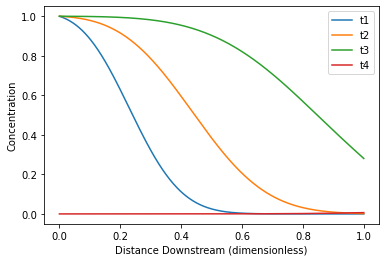

In [92]:
plot(x1,C1[100,:])
plot(x1,C1[200,:])
plot(x1,C1[400,:])
plot(x1,C1[1500,:])
xlabel('Distance Downstream (dimensionless)')
ylabel('Concentration')
legend(['t1','t2','t3','t4'])

Text(0, 0.5, 'Concentration at Quebec (dimensionless)')

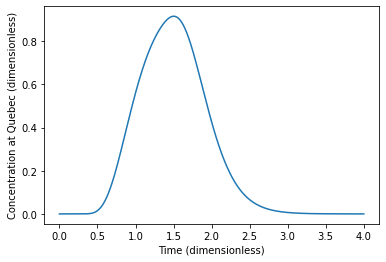

In [93]:
plot(t1,C1[:,-1])
xlabel('Time (dimensionless)')
ylabel('Concentration at Quebec (dimensionless)')

### Making animations

In [ ]:
#For this to work ffmpeg has to be available on your machine. In windows, you may need ffmpeg.exe.
#One way to accomplish this is to download ffmpeg.exe (it's free) and put it into the same directory as this file.
#Then replace the text below with r'.\ffmpeg.exe'
rcParams['animation.ffmpeg_path']= r'ffmpeg'
from matplotlib import animation
fig = figure()
plot(x1,C1[0])
ax = gca()
FFMpegWriter = animation.writers['ffmpeg']
writer = FFMpegWriter(fps=30)
with writer.saving(fig, "adv-disp-animation-fast.mp4",100):
    for n in arange(0,len(t1)):
        if n % 10 == 0:
            print("Making frame:",n)
        ax.clear()
        ax.plot(x1,C1[n,:])
        ylim([0,1.1])
        xlabel('Distance Downstream (dimensionless)')
        ylabel('Concentration')
        writer.grab_frame()
        